In [1]:
from piepy.core.mouse import Mouse
import matplotlib.pyplot as plt
import polars as pl
import datetime as dt

from piepy.plotters.detection.wheelDetectionBehaviorPlotter import WheelDetectionPerformanceProgressionPlotter

In [2]:
animalid = "KC303"
m = Mouse(animalid,'detection')

[24-08-08 11:45:12] - Set the data analysis paradigm to detection
[24-08-08 11:45:13] - Access granted to Mouse Database_new


In [3]:
m.gather_data(load_type='last_saved')

0it [00:00, ?it/s]

[24-08-08 11:45:29] - Gathering behavior data... : 1.92s


In [ ]:
m.data.summary_data.filter(pl.col("level")==6).sort(["total_trial_count"],descending=True)

In [ ]:
pp = WheelDetectionPerformanceProgressionPlotter(style="print")

In [ ]:
pp.set_data(cumul_data=m.data.cumul_data,summary_data=m.data.summary_data)

In [ ]:
pp.plot_type = "summary"

In [ ]:
pp.plot_hit_rate(figsize=(10,5),window_width=20,easy_only=True,color='gray')

In [ ]:
pp.plot_fa_rate(figsize=(10,5),window_width=20)

In [ ]:
pp.plot_type="summary"
pp.plot_median_rt(figsize=(10,5),window_width=300,easy_only=True)

In [ ]:
m.save()

In [ ]:
m.data.cumul_data.head(20)

In [ ]:
m.data.cumul_data.filter(pl.col("date").is_between(dt.date(2022,10,10),dt.date(2022,10,12)))

In [ ]:
f = plt.figure()
ax = f.add_subplot(111)

training_data = m.data.cumul_data.filter(pl.col("session_type")=="training")

training_data = training_data.with_columns(rolling_median=pl.col("response_latency").rolling_median(window_size=1000))

x = training_data["cumul_trial_no"].to_list()
y = training_data["rolling_median"].to_list()

ax.plot(x,y)

In [ ]:
m.data.summary_data.filter(pl.col("task").str.starts_with("Simple"))

In [7]:
animal_old = ["KC128","KC131","KC132","KC137"]
animal_kaan = ["KC300","KC301","KC139","KC142","KC143","KC144","KC145","KC146","KC147","KC148","KC149","KC150","KC151","KC152"]
animal_dylan = ["KC303","KC303","KC304","DM002"]

animalids = animal_old + animal_kaan + animal_dylan

hr_dict = {}
_session_offset = 0
for i,a in enumerate(animalids):
    m = Mouse(a,"detection")
    m.gather_data(load_type='last_saved')
    # detection_training_data = m.data.summary_data.filter(pl.col("task").str.starts_with("Simple"))
    # hr_dict[a] = detection_training_data["hit_rate"].to_list()
    
    m.data.summary_data = m.data.summary_data.with_columns(pl.lit(a).alias("animalid"))
    cols = m.data.summary_data.columns
    cols = ["animalid"] + cols[:-1]
    m.data.summary_data = m.data.summary_data.select(cols)
   
    # add a unique number to all sessions
    m.data.summary_data = m.data.summary_data.with_columns((pl.col("session_no")+_session_offset).alias("unique_session_no"))
    m.data.cumul_data = m.data.cumul_data.with_columns((pl.col("session_no")+_session_offset).alias("unique_session_no"))
    _session_offset += len(m.data.summary_data)
    
    if i == 0: 
        all_data_cumul = m.data.cumul_data
        all_data_summary = m.data.summary_data
    else:
        # sorting the columns
        new_cumul = m.data.cumul_data
        # fixing column datatypes
        if all_data_cumul.dtypes != new_cumul.dtypes:
            try:
                all_data_cumul = all_data_cumul.with_columns(
                    [
                        pl.col(n).cast(t)
                        for n, t in zip(all_data_cumul.columns, new_cumul.dtypes)
                        if t != pl.Null
                    ]
                )
            except:
                print("jlsdiobjsdf")
                
        new_summ = m.data.summary_data  
        all_data_summary = all_data_summary.with_columns(
                    [
                        pl.col(n).cast(t, strict=False)
                        for n, t in zip(all_data_summary.columns, new_summ.dtypes)
                        if t != pl.Null
                    ]
                )
        
        all_data_cumul = pl.concat([all_data_cumul,new_cumul])
        all_data_summary = pl.concat([all_data_summary,new_summ])
    

[24-08-12 14:27:29] - Set the data analysis paradigm to detection
[24-08-12 14:27:30] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:27:35] - Gathering behavior data... : 1.62s


[24-08-12 14:27:35] - Set the data analysis paradigm to detection
[24-08-12 14:27:36] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:27:40] - Gathering behavior data... : 1.93s


[24-08-12 14:27:41] - Set the data analysis paradigm to detection
[24-08-12 14:27:42] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:27:47] - Gathering behavior data... : 2.17s


[24-08-12 14:27:48] - Set the data analysis paradigm to detection
[24-08-12 14:27:50] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:27:55] - Gathering behavior data... : 1.98s


[24-08-12 14:27:56] - Set the data analysis paradigm to detection
[24-08-12 14:27:57] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:28:03] - Gathering behavior data... : 4.08s


[24-08-12 14:28:04] - Set the data analysis paradigm to detection
[24-08-12 14:28:05] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:28:12] - Gathering behavior data... : 3.88s


[24-08-12 14:28:13] - Set the data analysis paradigm to detection
[24-08-12 14:28:14] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:28:21] - Gathering behavior data... : 5.19s


[24-08-12 14:28:23] - Set the data analysis paradigm to detection
[24-08-12 14:28:24] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:28:30] - Gathering behavior data... : 3.76s


[24-08-12 14:28:32] - Set the data analysis paradigm to detection
[24-08-12 14:28:33] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:28:40] - Gathering behavior data... : 3.89s


[24-08-12 14:28:42] - Set the data analysis paradigm to detection
[24-08-12 14:28:43] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:28:50] - Gathering behavior data... : 3.84s


[24-08-12 14:28:52] - Set the data analysis paradigm to detection
[24-08-12 14:28:53] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:29:01] - Gathering behavior data... : 4.6s


[24-08-12 14:29:03] - Set the data analysis paradigm to detection
[24-08-12 14:29:04] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:29:11] - Gathering behavior data... : 4.02s


[24-08-12 14:29:13] - Set the data analysis paradigm to detection
[24-08-12 14:29:14] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:29:20] - Gathering behavior data... : 3.46s


[24-08-12 14:29:23] - Set the data analysis paradigm to detection
[24-08-12 14:29:24] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:29:31] - Gathering behavior data... : 3.45s


[24-08-12 14:29:33] - Set the data analysis paradigm to detection
[24-08-12 14:29:34] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:29:39] - Gathering behavior data... : 3.06s


[24-08-12 14:29:42] - Set the data analysis paradigm to detection
[24-08-12 14:29:43] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:29:47] - Gathering behavior data... : 1.36s


[24-08-12 14:29:49] - Set the data analysis paradigm to detection
[24-08-12 14:29:51] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:29:55] - Gathering behavior data... : 1.37s


[24-08-12 14:29:57] - Set the data analysis paradigm to detection
[24-08-12 14:29:59] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:30:03] - Gathering behavior data... : 1.42s


[24-08-12 14:30:06] - Set the data analysis paradigm to detection
[24-08-12 14:30:07] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:30:11] - Gathering behavior data... : 1.92s


[24-08-12 14:30:14] - Set the data analysis paradigm to detection
[24-08-12 14:30:15] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:30:20] - Gathering behavior data... : 1.5s


[24-08-12 14:30:22] - Set the data analysis paradigm to detection
[24-08-12 14:30:23] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:30:27] - Gathering behavior data... : 1.58s


[24-08-12 14:30:30] - Set the data analysis paradigm to detection
[24-08-12 14:30:31] - Access granted to Mouse Database_new


0it [00:00, ?it/s]

[24-08-12 14:30:36] - Gathering behavior data... : 1.49s


In [2]:
all_data_cumul = pl.read_parquet(r"J:\analysis\behavior_results\240806_all_mice_data\240806_cumulative_data.parquet")
all_data_summary = pl.read_parquet(r"J:\analysis\behavior_results\240806_all_mice_data\240806_summary_data.parquet")

In [3]:
# add rig time
from scipy.optimize import curve_fit
def transform_to_rig_time(data:pl.DataFrame) -> None:
    """Transforms the reaction time of trials that dont't have rig_reaction_time to that time frame"""
    with_rig_time = data.drop_nulls("rig_reaction_time")
    resp_time = with_rig_time["response_latency"]
    rig_time = with_rig_time["rig_reaction_time"]

    def m1_func(x, a):
        m = 1
        return m * x + a

    if len(rig_time):
        popt, pcov = curve_fit(
            m1_func, resp_time, rig_time
        )  # popt[0] is the time diff intercept

        all_resp_time = data["response_latency"]
        new_rig_times = m1_func(all_resp_time, *popt)

        tmp = pl.Series("temp_response_times", new_rig_times)
        data = data.with_columns(tmp)

        data = data.with_columns(
            pl.when(pl.col("outcome") != 0)
            .then(pl.col("temp_response_times"))
            .otherwise(pl.col("response_latency"))
            .alias("transformed_response_times")
        )
        # drop the temp column
        data = data.drop("temp_response_times")

    else:
        display("NO RIG TIME TO INTERPOLATE, COPYING STATE TIME", color="red")
        data = data.with_columns(
            pl.col("response_latency").alias("transformed_response_times")
        )
    return data

In [4]:
transformed_cumul = transform_to_rig_time(all_data_cumul)

In [6]:
transformed_cumul['transformed_response_times']

transformed_response_times
f64
1149.310921
881.310921
1682.310921
1265.310921
1312.310921
286.310921
150.310921
365.310921
1654.310921


<Axes: title={'center': 'Timing Differnces'}, xlabel='response_latency (ms)', ylabel='transformed_response_times (ms)'>

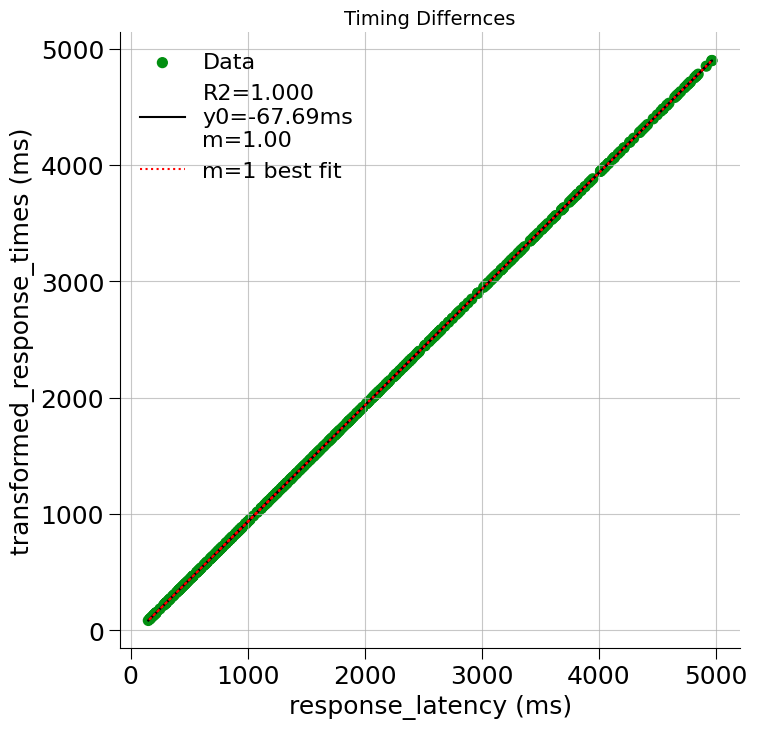

In [10]:
from piepy.scripts.plot_timing_differences import plot_all_timings, look_at_timing_differences
look_at_timing_differences(transformed_cumul[:1000],"response_latency","transformed_response_times",only_hit=True)

In [11]:
transformed_cumul.write_parquet(r"J:\analysis\behavior_results\240806_all_mice_data\240812_cumulative_data.parquet")
all_data_summary.write_parquet(r"J:\analysis\behavior_results\240806_all_mice_data\240812_summary_data.parquet")